
1.   To connect this notebook to Google Drive, run the code below.
2.   A link will appear
3.   Click the link and sign in to your Google account
4.   You will obtain an access code which needs to be copied and pasted into the input field below
5.   Press Enter

In [ ]:
from google.colab import drive # loads a library to mount your google drive
drive.mount('/content/drive') 

In [ ]:
!ls "/content/drive/My Drive/" # shows all files in your google drive root, including the project data file Tr0
path = "/content/drive/My Drive/" # sets the path to the root with the file Tr0

Unzip the images:

In [ ]:
import os     # loads a library to work with data files
os.chdir(path) 
dnam = 'Tr0'
!unzip -q {dnam} # unzups the project file Tr0

replace Tr0/yaleB02_P00A+000E+00.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Make a list of all images in the directory. 

In [ ]:
from os import listdir # loads a library to work with directories 
fls = listdir(path + dnam) # creates a list of all image files
n = len(fls) # the number of the image files  
print('Number of images %i' % n)

Number of images 1500


 Load and display 1st image using Matplotlib

(77, 68)


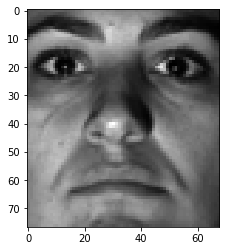

In [ ]:
from matplotlib import image # loads a library to work with images
from matplotlib import pyplot # loads a library to plot images
im1 = image.imread(path + dnam + '/' + fls[0]) # chooses 1st image from the image list
print(im1.shape) # prints the size in pixels of the chosen image 
pyplot.imshow(im1, cmap=pyplot.cm.gray) # displays the image
pyplot.show()

Create the data and target for training an ANN. The data will be a matrix of n=1500 rows and h*w columns, where n is the number of images, h=77 and w=68 are the height and width of an image in pixels. The target will be a nx1 matrix.

In [ ]:
import numpy as np  # loads a library for working with matrixes 
m=im1.shape[0]*im1.shape[1]  # m = h*w = (77*68=5236) is the number of pixels in images
images_data = np.zeros((n, m)) # creates a nxm-matrix of the images
images_target = np.zeros((n,))  # creates a n*1 matrix of targets which are the person labels 1 tp 30
# loops over all n=1500 images 
for i in range(0, n):
  filename = fls[i]  # loads a name of the image file
  img = image.imread(path + dnam + '/' + filename) # loads the image name
  images_data[i,:] = np.ravel(img) # vectorisation of the image 
  c = int(filename[5:7])  # extracts the class label from the file name
  images_target[i] = c  # assigns the target 
  #if i % 10 == 0:
  #  print('> loaded %s %s %s' % (i, filename, c)) # prints the image name

Save the data and target on Google drive as .npy files.

In [ ]:
from numpy import asarray # loads a library for saving matrices
from numpy import save
# save as a .npy file
fn = (path + '/' + 'yaleExtB_data.npy') # creates the file name for the image data
save(fn, images_data) 
fn = (path + '/' + 'yaleExtB_target.npy') # creates the file name for the targets
save(fn, images_target)


In [ ]:
# shows the files in the root, including 2 files *.npy 
!ls "/content/drive/My Drive/" 


'Colab Notebooks'   job_reference		    stockwood
 dep_reports	    PLANS_files			    Teaching
 DIY		   'PLANS & New submissions.gdoc'   Tr0
 ebooks		    Research			    Tr0.zip
 Editing	    Reviewing			    yaleExtB_data.npy
 J_2018		    RGS				    yaleExtB_target.npy
